In [1]:
import sys
sys.path.append('/home/anz2/PycharmProjects/bank-news-analysis/')

In [8]:
from model.tree import ParentedTreeWrapper
from model.tree import ContextTree
from model.data_extraction import DataExtractor
import spacy
import pandas as pd

In [3]:
data = pd.read_csv('../data/samples.csv', index_col=0)
texts = data.text.values.tolist()
texts = [x.replace(';', '.') for x in texts]

text = texts[0]

In [4]:
text

'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%. The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting'

In [5]:
nlp = spacy.load('en')
doc = nlp(text)
span = [x for x in doc.sents][0]

/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/anz2/anaconda3/envs/nlp/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192, got 176
  return f(*args, **kwds)


In [6]:
span

The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%.

## Test Old Data Extractor's performance

In [9]:
data_extractor = DataExtractor()

In [11]:
% timeit data_extractor.analyse(text)

133 ms ± 313 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## Construct NLTK's Parented Tree wrapper from spacy tokens

In [7]:
tree = ParentedTreeWrapper.from_spacy_tree(span.root)

In [8]:
text

'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%. The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting'

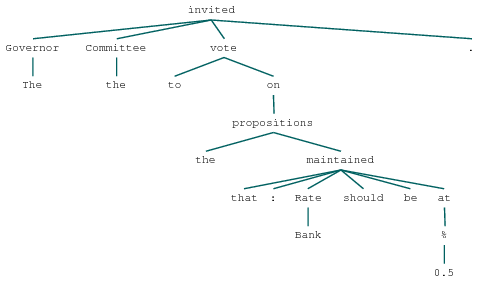

In [9]:
tree

### Test Methods Performance

In [10]:
%timeit [x for x in tree.subtrees()]

51.4 µs ± 3.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit tree.subtree_tokens()

30.3 µs ± 1.14 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [46]:
%timeit TreeWrapper.lca(tree,tree[2])

3.8 µs ± 62.1 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### I see no difference in time between yield and standart list appending methods :(

In [9]:
%timeit for x in tree.traverse(): pass

34.3 µs ± 2.25 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
%timeit for x in tree.preorder(): pass

34 µs ± 3.33 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
%timeit for x in tree.traverse('postorder'): pass

33.5 µs ± 1.37 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [11]:
%timeit for x in tree.postorder(): pass

31.2 µs ± 876 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
tree.leaves()

['The', 'the', 'to', 'the', 'that', ':', 'Bank', 'should', 'be', '0.5', '.']

In [15]:
% timeit tree.flatten()

13.4 µs ± 1.15 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [17]:
flat_tree = tree.flatten()

In [25]:
%timeit sorted(['the','that','be','to','The'], key=lambda x: flat_tree.index(x))

5.94 µs ± 364 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [26]:
%timeit sorted(['the','that','be','to','The'], key=lambda x: tree.flatten().index(x))

91.8 µs ± 19.6 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [74]:
tree.token.idx

13

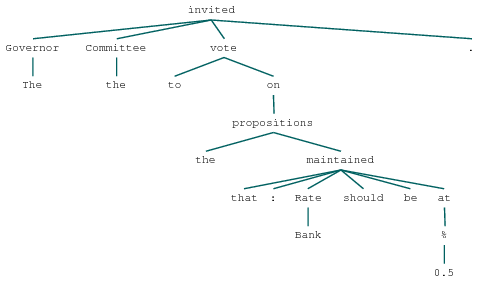

In [75]:
tree

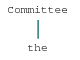

In [81]:
tree[1]

In [83]:
tree[0].token.idx

4

In [89]:
text

'The Governor invited the Committee to vote on the propositions that: Bank Rate should be maintained at 0.5%. The Bank of England should maintain the stock of purchased assets financed by the issuance of central bank reserves at £375 billion. Regarding Bank Rate, the Committee voted unanimously in favour of the proposition. Regarding the stock of purchased assets, the Committee voted unanimously in favour of the proposition. Minutes of the meeting'

In [ ]:
# for t in tree.subtrees():
#     print(t.token.idx)
#     t.draw()

In [79]:
tree[0].token.idx; tree[0][0].token.idx

0

## Construct Context Tree from nodes 

In [17]:
    v1 = {'pos': ['1']}
    v2 = {'pos': ['2']}
    v3 = {'pos': ['3']}
    v4 = {'pos': ['4']}
    v5 = {'pos': ['5']}
    v6 = {'pos': ['6']}

    t1 = ContextTree(v1)
    t2 = ContextTree(v2)
    t3 = ContextTree(v3)
    t4 = ContextTree(v4)
    t5 = ContextTree(v5)
    t6 = ContextTree(v6)

    t1.label = '1'
    t2.label = '2'
    t3.label = '3'
    t4.label = '4'
    t5.label = '5'
    t6.label = '6'

    t2.set_children([t4, t5])
    t3.set_children([t6])
    t1.set_children([t2, t3])


### Test Methods Performance

In [39]:
t1.candidates.extend([1,2,3])

In [40]:
t1.candidates

[1, 2, 3]

In [43]:
hasattr(t1, 'candidates')

True

In [46]:
t1.__getattribute__('candidates')[0]

1

In [39]:
%timeit for x in t1.traverse(): pass

4.98 µs ± 259 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [38]:
%timeit for x in t1.traversal(): pass

5.98 µs ± 203 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
